# 人工神经网络简介

In [1]:
!pip install --upgrade jax jaxlib
!conda install -y -c plotly plotly plotly-orca retrying

Channels:
 - plotly
 - default
 - defaults
Platform: linux-64

\ 

| 

/ 

- 

done
Solving environment: | 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done



## Package Plan ##

  environment location: /home/runner/miniconda3/envs/quantecon

  added / updated specs:
    - plotly
    - plotly-orca
    - retrying


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-orca-1.3.1          |                1        56.6 MB  plotly
    retrying-1.3.3             |     pyhd3eb1b0_2          14 KB
    ------------------------------------------------------------
                                           Total:        56.6 MB

The following NEW packages will be INSTALLED:

  plotly-orca        plotly/linux-64::plotly-orca-1.3.1-1 
  retrying           pkgs/main/noarch::retrying-1.3.3-pyhd3eb1b0_2 



plotly-orca-1.3.1    | 56.6 MB   |                                       |   0% 


retrying-1.3.3       | 14 KB     |                                       |   0% 
retrying-1.3.3       | 14 KB     | ##################################### | 100% 
retrying-1.3.3       | 14 KB     | ##################################### | 100% 

plotly-orca-1.3.1    | 56.6 MB   | ##################################### | 100% 



Preparing transaction: - 

done
Verifying transaction: | 

/ 

done
Executing transaction: \ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

done


```{note}
如果您在Google Colab上运行此代码，上述单元格将出现错误。这是因为Google Colab不使用Anaconda来管理Python包。但是本讲座仍然可以执行，因为Google Colab已安装了`plotly`。
```

## 概述

**机器学习**和**人工智能**的主要部分包括

* 用已知函数来近似未知函数
* 从左右变量的数据集中估计已知函数

本讲座描述了一种广泛用于近似函数$f$的普通**人工神经网络**(ANN)的结构，该函数将空间$X$中的$x$映射到空间$Y$中的$y$。

为了介绍基本概念，我们研究一个$x$和$y$都是标量的例子。

我们将描述以下神经网络的基本构建概念：
* 神经元
* 激活函数
* 神经元网络
* 神经网络作为函数的组合
* 反向传播及其与微积分链式法则的关系

## 一个深度(但不宽)的人工神经网络

我们描述一个"深度"神经网络,其"宽度"为一。

**深度**意味着网络由组织成图形节点的大量函数组成。

**宽度**指的是被近似函数右侧的变量数量。

将"宽度"设为一意味着网络仅组合单变量函数。

设$x \in \mathbb{R}$为一个标量,$y \in \mathbb{R}$为另一个标量。

我们假设$y$是$x$的一个非线性函数:

$$
y = f(x)
$$

我们想用另一个递归定义的函数来近似$f(x)$。

对于深度为$N \geq 1$的网络,每个**层**$i =1, \ldots N$包含

* 一个输入$x_i$
* 一个**仿射函数** $w_i x_i + bI$，其中 $w_i$ 是施加在输入 $x_i$ 上的标量**权重**，$b_i$ 是标量**偏置**

* 一个**激活函数** $h_i$，它以 $(w_i x_i + b_i)$ 为参数并产生输出 $x_{i+1}$
   
     
激活函数 $h$ 的一个例子是**sigmoid**函数

$$
h (z) = \frac{1}{1 + e^{-z}} 
$$


另一个常用的激活函数是**修正线性单元**（ReLU）函数

$$
h(z) = \max (0, z) 
$$


还有一个激活函数是恒等函数

$$ 
h(z) = z 
$$

作为下面的激活函数，我们将对第1层到第N-1层使用sigmoid函数，对第N层使用恒等函数。

为了近似函数 $f(x)$，我们按如下方式构造 $\hat f(x)$。

令

$$
 l_{i}\left(x\right)=w_{i}x+b_{i} . 
$$ 

我们通过迭代函数组合 $h_i \circ l_i$ 来构造 $\hat f$：

$$
f(x)\approx\hat{f}(x)=h_{N}\circ l_{N}\circ h_{N-1}\circ l_{1}\circ\cdots\circ h_{1}\circ l_{1}(x)
$$

如果 $N >1$，我们称右边为"深度"神经网络。

$N$ 这个整数越大，神经网络就越"深"。

显然，如果我们知道参数 $\{w_i, b_i\}_{i=1}^N$，那么对于给定的 $x = \tilde x$，我们可以通过迭代以下递归来计算 $\hat f(x)$：

$$
x_{i+1} = h_i \circ l_i(x_i) , \quad, i = 1, \ldots N
$$ (eq:recursion)

从 $x_1 = \tilde x$ 开始。

从这个迭代方案得出的 $x_{N+1}$ 的值等于 $\hat f(\tilde x)$。

## 参数校准

现在我们考虑一个如上所述的神经网络，其宽度为1，深度为 $N$，激活函数 $h_{i}$ （对于 $1\leqslant i\leqslant N$）将 $\mathbb{R}$ 映射到自身。

设 $\left\{ \left(w_{i},b_{i}\right)\right\} _{i=1}^{N}$ 表示权重和偏置的序列。

如上所述，对于给定的输入 $x_{1}$，我们的近似函数 $\hat f$ 求值
在 $x_1$ 等于我们网络的"输出" $x_{N+1}$ 时，可以通过迭代 $x_{i+1}=h_{i}\left(w_{i}x_{i}+b_{i}\right)$ 来计算。

对于给定的**预测值** $\hat{y} (x)$ 和**目标值** $y= f(x)$，考虑损失函数

$$
\mathcal{L} \left(\hat{y},y\right)(x)=\frac{1}{2}\left(\hat{y}-y\right)^{2}(x) .
$$

这个准则是参数 $\left\{ \left(w_{i},b_{i}\right)\right\} _{i=1}^{N}$ 和点 $x$ 的函数。

我们感兴趣的是解决以下问题：

$$
\min_{\left\{ \left(w_{i},b_{i}\right)\right\} _{i=1}^{N}} \int {\mathcal L}\left(x_{N+1},y\right)(x) d \mu(x)
$$

其中 $\mu(x)$ 是某个测度，用于衡量我们希望得到 $f(x)$ 的良好近似 $\hat f(x)$ 的点 $x \in \mathbb{R}$。

将权重和偏置堆叠成参数向量 $p$：

$$ 
p = \begin{bmatrix}     
  w_1 \cr 
  b_1 \cr
  w_2 \cr
  b_2 \cr
  \vdots \cr
  w_N \cr
  b_N 
\end{bmatrix}
$$
对**随机梯度下降**算法的一个"简化版本"应用于寻找函数的零点，得到以下参数更新规则：

$$
p_{k+1}=p_k-\alpha\frac{d \mathcal{L}}{dx_{N+1}}\frac{dx_{N+1}}{dp_k}
$$ (eq:sgd)

其中 $\frac{d {\mathcal L}}{dx_{N+1}}=-\left(x_{N+1}-y\right)$ 且 $\alpha > 0$ 是步长。

(参见[这里](https://en.wikipedia.org/wiki/Gradient_descent#Description)和[这里](https://en.wikipedia.org/wiki/Newton%27s_method)以了解随机梯度下降与牛顿法的关系。)

要实现这个参数更新规则的一个步骤，我们需要导数向量 $\frac{dx_{N+1}}{dp_k}$。

在神经网络文献中，这一步是通过所谓的**反向传播**来完成的。

## 反向传播和链式法则

得益于

* 微分演算中的链式法则和乘积法则的性质，以及

* 下三角矩阵的性质
反向传播实际上可以通过以下两步完成：

* 求下三角矩阵的逆矩阵，以及

* 矩阵乘法

(这个想法来自 MIT 的 Alan Edelman 在这个精彩的 YouTube 视频的最后 7 分钟)

```{youtube} rZS2LGiurKY
```

下面开始。

将 $h(z)$ 对 $z$ 在 $z = z_i$ 处的导数定义为 $\delta_i$：

$$
\delta_i = \frac{d}{d z} h(z)|_{z=z_i}
$$

或

$$
\delta_{i}=h'\left(w_{i}x_{i}+b_{i}\right). 
$$ 

对我们的递归式 {eq}`eq:recursion` 重复应用链式法则和乘积法则，可以得到：

$$
dx_{i+1}=\delta_{i}\left(dw_{i}x_{i}+w_{i}dx_{i}+b_{i}\right)
$$

在设定 $dx_{1}=0$ 后，我们得到以下方程组：

$$
\left(\begin{array}{c}
dx_{2}\\
\vdots\\
dx_{N+1}
\end{array}\right)=\underbrace{\left(\begin{array}{ccccc}
\delta_{1}w_{1} & \delta_{1} & 0 & 0 & 0\\
0 & 0 & \ddots & 0 & 0\\
0 & 0 & 0 & \delta_{N}w_{N} & \delta_{N}
\end{array}\right)}_{D}\left(\begin{array}{c}
dw_{1}\\
db_{1}\\
\vdots\\
dw_{N}\\
db_{N}
\end{array}\right)+\underbrace{\left(\begin{array}{cccc}
0 & 0 & 0 & 0\\
w_{2} & 0 & 0 & 0\\
0 & \ddots & 0 & 0\\
0 & 0 & w_{N} & 0
\end{array}\right)}_{L}\left(\begin{array}{c}
dx_{2}\\
\vdots\\
dx_{N+1}
\end{array}\right)
$$ 

或者

$$
d x = D dp + L dx
$$

这意味着

$$
dx = (I -L)^{-1} D dp
$$

进而意味着

$$
\left(\begin{array}{c}
dx_{N+1}/dw_{1}\\
dx_{N+1}/db_{1}\\
\vdots\\
dx_{N+1}/dw_{N}\\
dx_{N+1}/db_{N}
\end{array}\right)=e_{N}\left(I-L\right)^{-1}D.
$$

然后我们可以通过对一组输入-输出对$\left\{ \left(x_{1}^{i},y^{i}\right)\right\} _{i=1}^{M}$（我们称之为"训练集"）多次应用我们的$p$更新来解决上述问题。

## 训练集

选择训练集相当于在上述函数逼近问题的最小化问题表述中选择测度$\mu$。

本着这个精神，我们将使用均匀网格，比如说50或200个点。
对于上述最小化问题，有多种可能的解决方案：

* 批量梯度下降，使用训练集上的平均梯度

* 随机梯度下降，随机采样点并使用单个梯度

* 介于两者之间的方法（即所谓的"小批量梯度下降"）

上面描述的更新规则 {eq}`eq:sgd` 相当于一个随机梯度下降算法。

In [2]:
from IPython.display import Image
import jax.numpy as jnp
from jax import grad, jit, jacfwd, vmap
from jax import random
import jax
import plotly.graph_objects as go

In [3]:
# 一个辅助函数，用于随机初始化密集神经网络层的权重和偏置
def random_layer_params(m, n, key, scale=1.):
    w_key, b_key = random.split(key)
    return scale * random.normal(w_key, (n, m)), scale * random.normal(b_key, (n,))

# 初始化具有"sizes"大小的全连接神经网络的所有层
def init_network_params(sizes, key):
    keys = random.split(key, len(sizes))
    return [random_layer_params(m, n, k) for m, n, k in zip(sizes[:-1], sizes[1:], keys)]

In [4]:
def compute_xδw_seq(params, x):
    # 初始化数组
    δ = jnp.zeros(len(params))
    xs = jnp.zeros(len(params) + 1)
    ws = jnp.zeros(len(params))
    bs = jnp.zeros(len(params))
    
    h = jax.nn.sigmoid
    
    xs = xs.at[0].set(x)
    for i, (w, b) in enumerate(params[:-1]):
        output = w * xs[i] + b
        activation = h(output[0, 0])
        
        # 存储元素
        δ = δ.at[i].set(grad(h)(output[0, 0]))
        ws = ws.at[i].set(w[0, 0])
        bs = bs.at[i].set(b[0])
        xs = xs.at[i+1].set(activation)

    final_w, final_b = params[-1]
    preds = final_w * xs[-2] + final_b
    
    # 存储元素
    δ = δ.at[-1].set(1.)
    ws = ws.at[-1].set(final_w[0, 0])
    bs = bs.at[-1].set(final_b[0])
    xs = xs.at[-1].set(preds[0, 0])
    
    return xs, δ, ws, bs
    

def loss(params, x, y):
    xs, δ, ws, bs = compute_xδw_seq(params, x)
    preds = xs[-1]
    
    return 1 / 2 * (y - preds) ** 2

In [5]:
# 参数
N = 3  # 层数
layer_sizes = [1, ] * (N + 1)
param_scale = 0.1
step_size = 0.01
params = init_network_params(layer_sizes, random.PRNGKey(1))

In [6]:
x = 5
y = 3
xs, δ, ws, bs = compute_xδw_seq(params, x)

In [7]:
dxs_ad = jacfwd(lambda params, x: compute_xδw_seq(params, x)[0], argnums=0)(params, x)
dxs_ad_mat = jnp.block([dx.reshape((-1, 1)) for dx_tuple in dxs_ad for dx in dx_tuple ])[1:]

In [8]:
jnp.block([[δ * xs[:-1]], [δ]])

Array([[1.0165801 , 0.06087969, 0.09382247],
       [0.20331602, 0.08501981, 1.        ]], dtype=float32)

In [9]:
L = jnp.diag(δ * ws, k=-1)
L = L[1:, 1:]

D = jax.scipy.linalg.block_diag(*[row.reshape((1, 2)) for row in jnp.block([[δ * xs[:-1]], [δ]]).T])

dxs_la = jax.scipy.linalg.solve_triangular(jnp.eye(N) - L, D, lower=True)

In [10]:
# 检查由线性代数方法生成的`dx`
# 是否与使用自动微分生成的结果相同
jnp.max(jnp.abs(dxs_ad_mat - dxs_la))

Array(0., dtype=float32)

In [11]:
grad_loss_ad = jnp.block([dx.reshape((-1, 1)) for dx_tuple in grad(loss)(params, x, y) for dx in dx_tuple ])

In [12]:
# 检查两种方法的损失梯度是否相同
jnp.max(jnp.abs(-(y - xs[-1]) * dxs_la[-1] - grad_loss_ad))

Array(5.9604645e-08, dtype=float32)

In [13]:
@jit
def update_ad(params, x, y):
    grads = grad(loss)(params, x, y)
    return [(w - step_size * dw, b - step_size * db)
          for (w, b), (dw, db) in zip(params, grads)]

@jit
def update_la(params, x, y):
    xs, δ, ws, bs = compute_xδw_seq(params, x)
    N = len(params)
    L = jnp.diag(δ * ws, k=-1)
    L = L[1:, 1:]

    D = jax.scipy.linalg.block_diag(*[row.reshape((1, 2)) for row in jnp.block([[δ * xs[:-1]], [δ]]).T])
    
    dxs_la = jax.scipy.linalg.solve_triangular(jnp.eye(N) - L, D, lower=True)
    
    grads = -(y - xs[-1]) * dxs_la[-1]
    
    return [(w - step_size * dw, b - step_size * db) 
            for (w, b), (dw, db) in zip(params, grads.reshape((-1, 2)))]
    

In [14]:
# 检查两次更新是否相同
update_la(params, x, y)

[(Array([[-0.00826643]], dtype=float32), Array([0.94700736], dtype=float32)),
 (Array([[-2.0638916]], dtype=float32), Array([-0.7872697], dtype=float32)),
 (Array([[1.6248171]], dtype=float32), Array([1.5765371], dtype=float32))]

In [15]:
update_ad(params, x, y)

[(Array([[-0.00826644]], dtype=float32), Array([0.94700736], dtype=float32)),
 (Array([[-2.0638916]], dtype=float32), Array([-0.7872697], dtype=float32)),
 (Array([[1.6248171]], dtype=float32), Array([1.5765371], dtype=float32))]

## 示例 1

考虑函数

$$
f\left(x\right)=-3x+2
$$

在区间 $\left[0.5,3\right]$ 上。

我们使用200个点的均匀网格，并对网格上的每个点更新参数300次。

$h_{i}$ 是除最后一层外所有层的sigmoid激活函数，最后一层使用恒等函数，且 $N=3$。

权重随机初始化。

In [16]:
def f(x):
    return -3 * x + 2

M = 200
grid = jnp.linspace(0.5, 3, num=M)
f_val = f(grid)

In [17]:
indices = jnp.arange(M)
key = random.PRNGKey(0)

def train(params, grid, f_val, key, num_epochs=300):
    for epoch in range(num_epochs):
        key, _ = random.split(key)
        random_permutation = random.permutation(random.PRNGKey(1), indices)
        for x, y in zip(grid[random_permutation], f_val[random_permutation]):
            params = update_la(params, x, y)
            
    return params 

In [18]:
# 参数
N = 3  # 层数
layer_sizes = [1, ] * (N + 1)
params_ex1 = init_network_params(layer_sizes, key)

In [19]:
%%time 
params_ex1 = train(params_ex1, grid, f_val, key, num_epochs=500)

CPU times: user 3.82 s, sys: 29.4 ms, total: 3.85 s
Wall time: 3.49 s


In [20]:
predictions = vmap(compute_xδw_seq, in_axes=(None, 0))(params_ex1, grid)[0][:, -1]

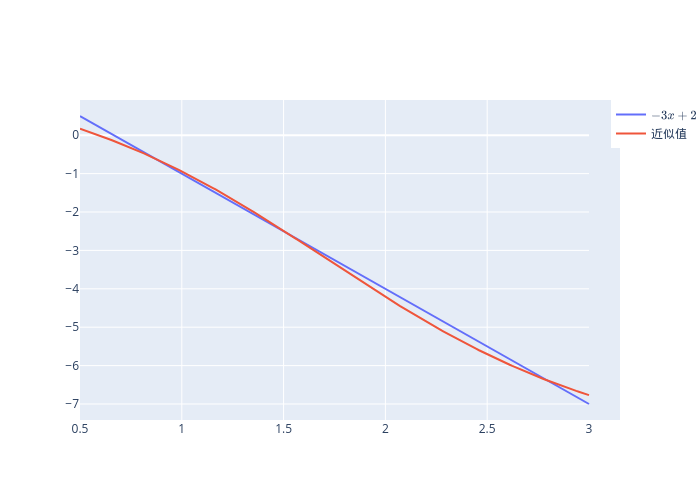

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=grid, y=f_val, name=r'$-3x+2$'))
fig.add_trace(go.Scatter(x=grid, y=predictions, name='近似值'))

# 导出为PNG文件
Image(fig.to_image(format="png"))
# 在本地运行notebook时
# fig.show()将提供交互式图表

## 深度多少？

思考上述例子中加深神经网络如何影响近似质量是一件很有趣的事

* 如果网络太深，你会遇到[梯度消失问题](http://neuralnetworksanddeeplearning.com/chap5.html)
* 在本讲所考虑的情况下，步长和训练轮数等其他参数可能与网络层数一样重要或更重要
* 实际上，由于$f$是$x$的线性函数，使用恒等映射作为激活函数的单层网络可能效果最好。



## 示例2

我们使用与前一个示例相同的设置，其中

$$
f\left(x\right)=\log\left(x\right)
$$

In [22]:
def f(x):
    return jnp.log(x)

grid = jnp.linspace(0.5, 3, num=M)
f_val = f(grid)

In [23]:
# 参数
N = 1  # 层数
layer_sizes = [1, ] * (N + 1)
params_ex2_1 = init_network_params(layer_sizes, key)

In [24]:
# 参数
N = 2  # 层数
layer_sizes = [1, ] * (N + 1)
params_ex2_2 = init_network_params(layer_sizes, key)

In [25]:
# 参数
N = 3  # 层数
layer_sizes = [1, ] * (N + 1)
params_ex2_3 = init_network_params(layer_sizes, key)

In [26]:
params_ex2_1 = train(params_ex2_1, grid, f_val, key, num_epochs=300)

In [27]:
params_ex2_2 = train(params_ex2_2, grid, f_val, key, num_epochs=300)

In [28]:
params_ex2_3 = train(params_ex2_3, grid, f_val, key, num_epochs=300)

In [29]:
predictions_1 = vmap(compute_xδw_seq, in_axes=(None, 0))(params_ex2_1, grid)[0][:, -1]
predictions_2 = vmap(compute_xδw_seq, in_axes=(None, 0))(params_ex2_2, grid)[0][:, -1]
predictions_3 = vmap(compute_xδw_seq, in_axes=(None, 0))(params_ex2_3, grid)[0][:, -1]

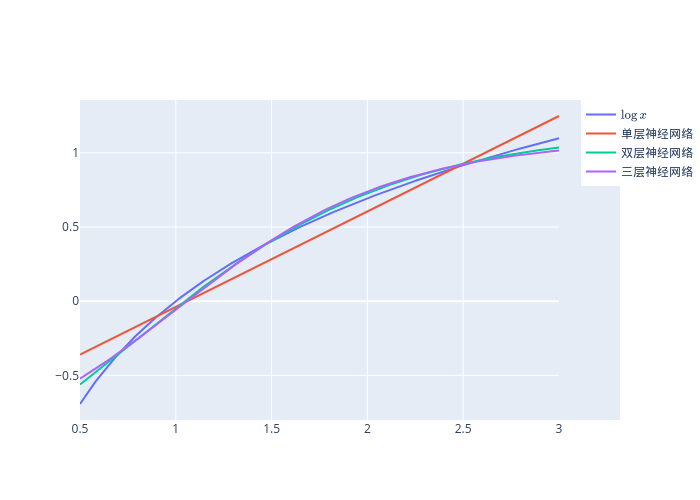

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=grid, y=f_val, name=r'$\log{x}$'))
fig.add_trace(go.Scatter(x=grid, y=predictions_1, name='单层神经网络'))
fig.add_trace(go.Scatter(x=grid, y=predictions_2, name='双层神经网络'))
fig.add_trace(go.Scatter(x=grid, y=predictions_3, name='三层神经网络'))

# 导出为PNG文件
Image(fig.to_image(format="png"))
# 在本地运行notebook时，fig.show()将提供交互式图表

In [31]:
## 检查环境中是否启用了gpu

from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

cpu


/tmp/ipykernel_6716/4016357847.py:4: DeprecationWarning:

jax.lib.xla_bridge.get_backend is deprecated; use jax.extend.backend.get_backend.



```{note}
**云环境：** 此讲座网站是在无法访问`gpu`的服务器环境中构建的
如果您在本地运行此讲座，这将让您知道代码是通过`cpu`还是`gpu`执行的
```